In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Load the data sets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [5]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype = "float32")

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype = "float32")

In [8]:
opt = tf.keras.optimizers.SGD(learning_rate=1.4e-2, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train_categorical, epochs=10,batch_size=50,
                   validation_data=(x_test, y_test_categorical))

Epoch 1/10
1000/1000 [==============================] - 155s 143ms/step - loss: 0.6162 - accuracy: 0.7845 - val_loss: 0.9785 - val_accuracy: 0.6829
Epoch 2/10
1000/1000 [==============================] - 52s 52ms/step - loss: 0.5426 - accuracy: 0.8083 - val_loss: 0.9690 - val_accuracy: 0.6884
Epoch 3/10
1000/1000 [==============================] - 53s 53ms/step - loss: 0.5135 - accuracy: 0.8197 - val_loss: 1.0000 - val_accuracy: 0.7005
Epoch 4/10
1000/1000 [==============================] - 58s 58ms/step - loss: 0.4893 - accuracy: 0.8262 - val_loss: 1.0409 - val_accuracy: 0.6894
Epoch 5/10
1000/1000 [==============================] - 62s 62ms/step - loss: 0.4876 - accuracy: 0.8251 - val_loss: 1.0660 - val_accuracy: 0.6819
Epoch 6/10
1000/1000 [==============================] - 62s 62ms/step - loss: 0.4731 - accuracy: 0.8334 - val_loss: 1.0651 - val_accuracy: 0.6948
Epoch 7/10
1000/1000 [==============================] - 65s 65ms/step - loss: 0.4623 - accuracy: 0.8373 - val_loss: 1.1467

313/313 - 4s - loss: 1.1850 - accuracy: 0.6814
1563/1563 - 23s - loss: 0.4132 - accuracy: 0.8546
test_loss= 1.1849976778030396
test_acc= 0.6814000010490417
train_loss= 0.4132252335548401
train_acc= 0.8545600175857544


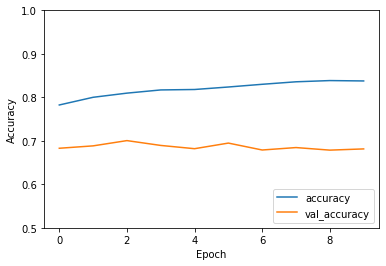

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)
train_loss, train_acc = model.evaluate(x_train, y_train_categorical, verbose=2)

print("test_loss=",test_loss)
print("test_acc=",test_acc)
print("train_loss=",train_loss)
print("train_acc=",train_acc)